In [46]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("elmadafri/the-wildfire-dataset")

print("Path to dataset files:", path)


Path to dataset files: /kaggle/input/the-wildfire-dataset


In [47]:

# Importing necessary libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input



In [48]:
# Check if GPU is available and configure memory growth
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        tf.config.experimental.set_memory_growth(gpus[0], True)
        print("GPU is available and configured!")
    except RuntimeError as e:
        print(f"Failed to set memory growth: {e}")
else:
    print("No GPU found!")


Failed to set memory growth: Physical devices cannot be modified after being initialized


In [49]:
# Load and explore the dataset
train_dir = '/root/.cache/kagglehub/datasets/elmadafri/the-wildfire-dataset/versions/3/the_wildfire_dataset_2n_version/train'
val_dir = '/root/.cache/kagglehub/datasets/elmadafri/the-wildfire-dataset/versions/3/the_wildfire_dataset_2n_version/val'
test_dir = '/root/.cache/kagglehub/datasets/elmadafri/the-wildfire-dataset/versions/3/the_wildfire_dataset_2n_version/test'


In [44]:
import kagglehub
import os

# Download latest version
path = kagglehub.dataset_download("elmadafri/the-wildfire-dataset")

print("Path to dataset files:", path)

# Update the paths based on the output of the above line
train_dir = os.path.join(path, 'the_wildfire_dataset_2n_version', 'train')
# Assuming 'the_wildfire_dataset_2n_version' is a subdirectory in the downloaded path and contains 'train'
val_dir = os.path.join(path, 'the_wildfire_dataset_2n_version', 'val')
test_dir = os.path.join(path, 'the_wildfire_dataset_2n_version', 'test')

# List all the classes
classes = os.listdir(train_dir)
num_classes = len(classes)

# Display the class names
print(f'Number of Classes: {num_classes}')
print(f'Classes: {classes}')

100%|██████████| 9.94G/9.94G [08:21<00:00, 21.3MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/elmadafri/the-wildfire-dataset/versions/3
Number of Classes: 2
Classes: ['fire', 'nofire']


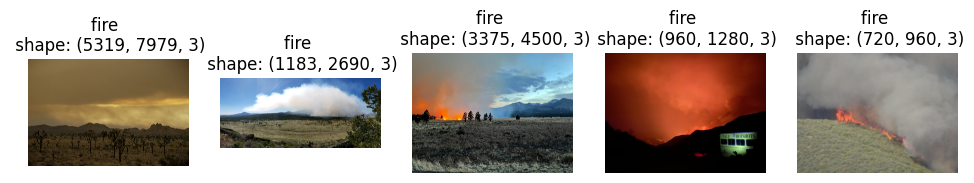

In [45]:
# Visualize sample images from the dataset
plt.figure(figsize=(12, 10))
sample_class_dir = os.path.join(train_dir, class_labels[0])
sample_images = os.listdir(sample_class_dir)[:5]

for index, image_file in enumerate(sample_images):
    image_path = os.path.join(sample_class_dir, image_file)
    image = plt.imread(image_path)

    plt.subplot(1, 5, index + 1)
    plt.imshow(image)
    plt.title(f'{class_labels[0]}\nSize: {image.shape}')
    plt.axis('off')

plt.tight_layout()
plt.show()


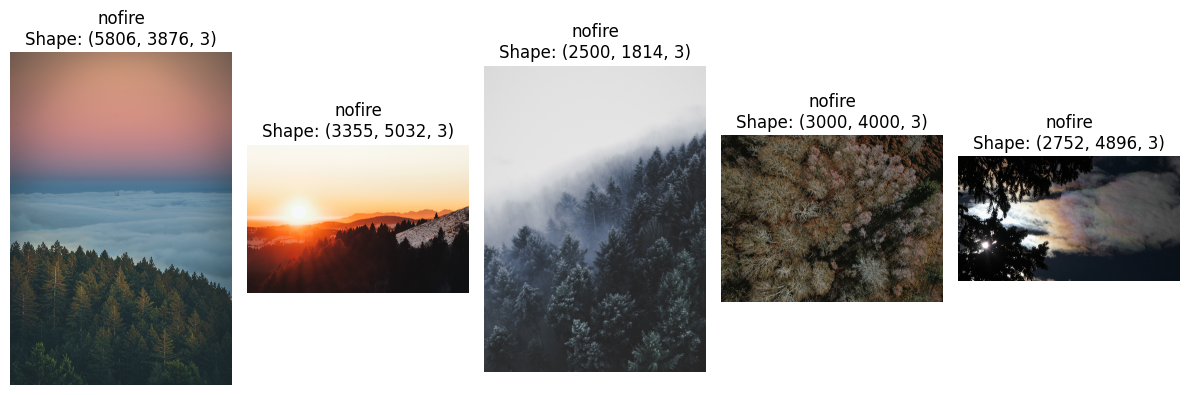

In [59]:
# Show first 5 images from the second class in the training dataset
import os
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))

target_class = classes[1]
target_path = os.path.join(train_dir, target_class)

image_names = os.listdir(target_path)[:5]

for index, image_name in enumerate(image_names):
    image_full_path = os.path.join(target_path, image_name)
    image_data = plt.imread(image_full_path)

    plt.subplot(1, 5, index + 1)
    plt.imshow(image_data)
    plt.title(f'{target_class}\nShape: {image_data.shape}')
    plt.axis('off')

plt.tight_layout()
plt.show()

In [60]:
# Image preprocessing configuration
image_size = (150, 150)
batch_sz = 32  # Number of images per batch

# Define data rescaling for all sets
rescale_gen = ImageDataGenerator(rescale=1.0 / 255)

# Training data loader
train_loader = rescale_gen.flow_from_directory(
    directory=train_dir,
    target_size=image_size,
    batch_size=batch_sz,
    class_mode='binary',
    shuffle=True
)

# Validation data loader
validation_loader = rescale_gen.flow_from_directory(
    directory=val_dir,
    target_size=image_size,
    batch_size=batch_sz,
    class_mode='binary',
    shuffle=True
)

# Testing data loader
test_loader = rescale_gen.flow_from_directory(
    directory=test_dir,
    target_size=image_size,
    batch_size=batch_sz,
    class_mode='binary',
    shuffle=True
)


Found 1887 images belonging to 2 classes.
Found 402 images belonging to 2 classes.
Found 410 images belonging to 2 classes.


In [61]:
# Retrieve and display class labels from the training loader
label_map = train_loader.class_indices
# print(label_map)
labels = list(label_map.keys())
print("Classes found:", labels)


Classes found: ['fire', 'nofire']


In [62]:
# Construct an alternative CNN model
model = Sequential()

# Input and first convolutional block
model.add(Input(shape=(150, 150, 3)))
model.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=2))

# Second convolutional block
model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=2))

# Third convolutional block
model.add(Conv2D(filters=128, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=2))

# Fully connected layers
model.add(Flatten())
model.add(Dense(units=512, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(units=1, activation='sigmoid'))


In [63]:
# Compile the model with Adam optimizer and binary crossentropy loss
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Display the model architecture summary
print("Model Summary:")
model.summary()


Model Summary:


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │    18,940,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,034,177 (72.61 MB)

 Trainable params: 19,034,177 (72.61 MB)

 Non-trainable params: 0 (0.00 B)

In [64]:
print("Thank you Sir")

Thank you Sir
